### Geometric Computer Vision, Skoltech, 2021
#### Alexey Artemov, Aleksandr Safin

### K3D

Is a library for 3D visualization

More info on:
- https://k3d-jupyter.org/
- https://github.com/K3D-tools/K3D-jupyter

### How to install

#### Conda/Anaconda
To install from conda-forge use:

`conda install -c conda-forge k3d`

#### PyPI
To install from PyPI use pip:

`pip install k3d`

### Warmup, just start with points

In [22]:
import k3d
import numpy as np

Let us just create empty plot and see:

In [21]:
plot = k3d.plot(name='points')
plot.display()

Output()

In [ ]:
### Generate random point cloud


In [25]:
x = np.random.randn(1000,3).astype(np.float32) # just generate 1000 random 3d points
point_size = 0.2

In [23]:
?k3d.points

In [26]:
k3d.points(positions=x, point_size=point_size)

Output()

In [19]:
plot = k3d.plot(name='points')
plt_points = k3d.points(positions=x, point_size=point_size) # create k3d.points and add it to the plot
plot += plt_points
plt_points.shader='3d'
plot.display()

Output()

**Exercise:** generate second point cloud with different center and add it to the plot

If you do not see any plots, try in console:
```jupyter nbextension install --py --sys-prefix k3d
jupyter nbextension enable --py --sys-prefix k3d```

And then verify by: `jupyter nbextension list`

Then click "Widgets" -> "Clear Notebook Widget State". Shutdown you notebook and open it again

You could save the snapshot as html, for that you need to
`plot.fetch_snapshot()` and then write `plot.snapshot` to .html 

Also you could make a screenshoot via python (but for some reason, the points are of smaller size)

In [13]:
import io
import base64
from PIL import Image

In [14]:
plot.fetch_screenshot()

In [15]:
base64_decoded = base64.b64decode(plot.screenshot)
image = Image.open(io.BytesIO(base64_decoded))

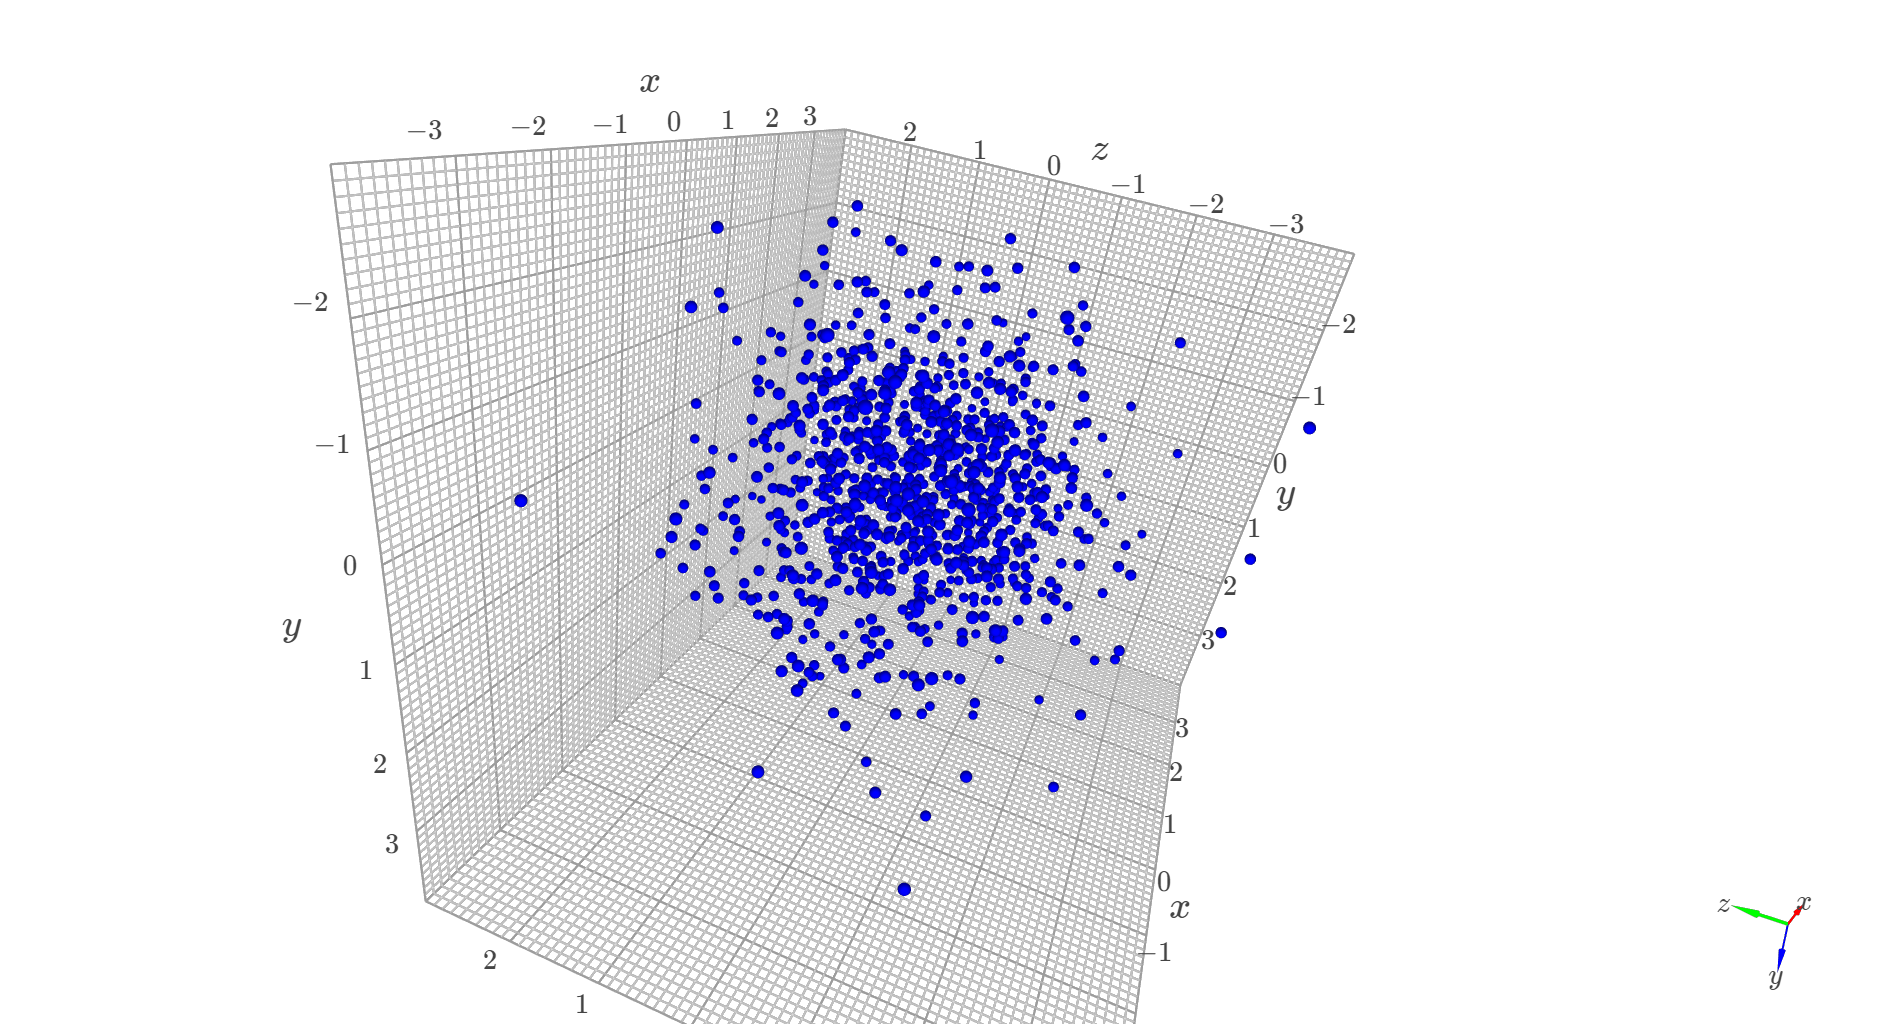

In [16]:
image

Let's color the points:

In [17]:
f = (np.sum(x**3-.1*x**2,axis=1))
colormap = k3d.colormaps.basic_color_maps.WarmCool
colors = k3d.helpers.map_colors(f,colormap,[-2,.1])
colors = colors.astype(np.uint32)

In [18]:
plt_points.colors = colors
plt_points.positions = {str(t):x/(1+t*3) for t in np.linspace(0,4,4)}
plot.start_auto_play()

### Surface
One could define a surface as $z = F(x,y)$

In [9]:
import numpy as np
import k3d

plot = k3d.plot()

Nx, Ny = 40, 80
xmin, xmax, ymin, ymax = -3, 3, 0, 3

x = np.linspace(xmin, xmax, Nx, dtype=np.float32)
y = np.linspace(ymin, ymax, Ny, dtype=np.float32)
x, y = np.meshgrid(x, y)

### use linspace and meshgrid to create 2d grid 

heights = np.sin(x**2 + y**2)

plt_surface = k3d.surface(heights, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
plot += plt_surface

plot.display()

Output()

In [14]:
heights.shape

(80, 40)

### Implicit plot
Another option is to specify the surface implicitly as $C$-level set $F(x,y,z)=C$ of some function $F(x,y,z)$.
To extract the surface from such implicit representation, we need to use, for instance, marching cubes

In [10]:
import k3d
import numpy as np
import time
plot = k3d.plot()


T = 1.6
from numpy import sin,cos,pi
r = 4.77
zmin,zmax = -r,r
xmin,xmax = -r,r
ymin,ymax = -r,r
Nx,Ny,Nz = 37,37,37

x = np.linspace(xmin, xmax, Nx, dtype=np.float32)
y = np.linspace(ymin, ymax, Ny, dtype=np.float32)
z = np.linspace(zmin, zmax, Nz, dtype=np.float32)
x,y,z = np.meshgrid(x,y,z,indexing='ij')

# make 3d grid, use linspace meshgrid with indexing='ij'

p = 2 - (cos(x + T*y) + cos(x - T*y) + cos(y + T*z) + cos(y - T*z) + cos(z - T*x) + cos(z + T*x))
plt_iso = k3d.marching_cubes(p,compression_level=9,xmin=xmin, xmax=xmax,
                         ymin=ymin, ymax=ymax,
                         zmin=zmin, zmax=zmax, level=0.0,
                        flat_shading=False)
plot += plt_iso
plot.display()

Output()

In [11]:
from ipywidgets import FloatSlider, jslink
w = FloatSlider(min=-2,max=5,value=-2)
l = jslink((plt_iso,'level'),(w,'value'))
w

FloatSlider(value=-2.0, max=5.0, min=-2.0)

### 3d Data Formats and How to Work with Them

### Open3d

Is a library 

More info on:
- http://www.open3d.org/docs

### How to install

#### Conda/Anaconda
To install from conda-forge use:

`conda install -c open3d-admin open3d`

**!  Currently** it could be a problem to install this package through conda, therefore try installing it via pip in case of any problems with conda:

#### PyPI
To install from PyPI use pip:

`pip install open3d`

In [12]:
import open3d as o3d

One may need to do `sudo apt install libusb-1.0-0` in case of related error.

### Point Clouds
It could be stored in various formats, just to name most popular ones:
* ply (Polygon File Format, could be used to store just point clouds)
* pcd ([Point Cloud Data](http://pointclouds.org/documentation/tutorials/pcd_file_format.html))

In [13]:
pcd = o3d.io.read_point_cloud("sample_data/shark.pcd")

**Exercise:** plot point cloud, to access points you could use `pcd.points`, try color and point_size:

In [30]:
?k3d.points

In [14]:
k3d.points(pcd.points, point_size=0.01)

Output()

To save mesh, use `o3d.io.write_point_cloud("file_path_with_extension", pcd)` 

### Mesh 
It is a set of triangles which defines 3d surface

It could be stored in various formats, just to name most popular ones:
* ply (Polygon File Format, could be used to store just point clouds)
* obj (Object Files)
* stl (StereoLithography)

#### PLY
The PLY format describes an object as a collection of vertices, faces and other elements, along with properties such as color and normal direction that can be attached to these elements.

A typical PLY object definition is:
* a list of (x,y,z) triples for vertices 
* a list of faces that are described by indices into the list of vertices
* and other properties

[See more here](http://paulbourke.net/dataformats/ply/)

#### STL
- consists of a list of facet data. Each facet is uniquely identified by a unit normal (a line perpendicular to the triangle and with a length of 1.0) and by three vertices (corners). The normal and each vertex are specified by three coordinates each

[See more here](http://www.fabbers.com/tech/STL_Format)

**How many numbers are needed to be stored for each vertex in STL format?**


#### OBJ
It is represented by a file in an ASCII text format.
It has lines with the following information:
* geometric vertices (v)
* vertex normals (vn)
* texture vertices (vt)

[See more here](http://paulbourke.net/dataformats/obj/)

**Exercise:** read some `.stl` file from `sample_data/abc_samples`. Use `o3d.io.read_triangle_mesh`

In [15]:
mesh = o3d.io.read_triangle_mesh("sample_data/abc_samples/00500041_5aa40dcd43fa0b14df9bdcf8_010__20.5mm.stl")
print(mesh)

TriangleMesh with 97068 points and 32356 triangles.


Check some attributes of mesh object

In [16]:
np.asarray(mesh.vertex_colors)

array([], shape=(0, 3), dtype=float64)

To use `k3d` for visualization, we need to create the object using `k3d`. For mesh it is `k3d.mesh()`

In [21]:
?k3d.mesh

**Exercise:** visualize this mesh using `k3d.mesh` to create corresponding object

In [17]:
k3d.mesh(np.asarray(mesh.vertices), np.asarray(mesh.triangles))

/opt/conda/lib/python3.7/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  np.dtype(self.dtype).name))
/opt/conda/lib/python3.7/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "int32" does not match required type "uint32". A coerced copy has been created.
  np.dtype(self.dtype).name))


Output()

**Exercise:** visualize this mesh, by explicitly creating `k3d.plot` and the call `.display()`

In [18]:
plot = k3d.plot(name='points')
plt_mesh = k3d.mesh(np.asarray(mesh.vertices), np.asarray(mesh.triangles))
plot += plt_mesh
plt_mesh.shader='3d'
plot.display()

Output()

**Exercise:** check whether .stl file is just a text file 

In [19]:
!cat "sample_data/abc_samples/00500041_5aa40dcd43fa0b14df9bdcf8_010__20.5mm.stl" | head

                                                                                d~  �"y���k��}�nߍ�H�����>�@������8�=�������>  �"y���k��!�X������+���ޠ���g�pB�����m���PT�  �"y��k��G2�b?���w��5�o@�����Ӓ�P�x@�����bQb@  �"y�ыk�?;5e���Zz@{�$>���ΰ�@!�<�����s@��ͽ  �"y�ҋk�� �3)��E̿��@k=������@yk�������{@  �"y�Ћk��B4������H@��ο������?@�d𿻆��14@]ҿ  �"y�΋k�(�������<@H䲿������H@��ο����14@]ҿ  �"y�k�Nr:��$���`�?���ù���?/?$�L���E��?�)�  �"y��k��Ѵ�R���OT@���������U@����]��5�C@0��  �"y��k��(v5�R���OT@�������o�P@
G��	����ng@���  �"y��k�+�L3AB����[�s_3�� ����\�9J�FM���Rl�nq<�  �"y��k�4*F���@1�羪���@ޝܽ*V���3@�͢�  �"y�܋k��85���`,�?zr?X��[��?]��?1$�����?��M?  �"y��k���3����@ޝܽ{s���+@����*V���3@�͢�  �"y��k�Nb��j`����k��&�AB����[�s_3�FM���Rl�nq<�  �"y���k�"�5X��[��?]��?���::�?i�b?1$�����?��M?  �"y�΋k�	���@������8�=nߍ�H�����>�D������6�z=  �"y��k���#�/����p?�\�>�5���S:��f3?֢���C.�og?  �"y���k�	in5!���F������@������8�=c���۠����=�  �"y�ҋk�f+j��˱��

**Exercise:** read some `.obj` file from `sample_data/abc_samples/`, visualize it and see what is inside

In [20]:
mesh = o3d.io.read_triangle_mesh("sample_data/abc_samples/00010110_a35af5bb7a7a42fe9539f3b7_002.obj")
print(mesh)

TriangleMesh with 107514 points and 35838 triangles.


In [21]:
k3d.mesh(np.asarray(mesh.vertices), np.asarray(mesh.triangles))

Output()

In [22]:
!cat "sample_data/abc_samples/00010110_a35af5bb7a7a42fe9539f3b7_002.obj" | grep vt

To save mesh, use `o3d.io.write_triangle_mesh("file_path_with_extension", mesh)`

### Trimesh

Is a library 

More info on:
- https://github.com/mikedh/trimesh
- https://trimsh.org/examples.html

### How to install

#### Conda/Anaconda
To install from conda-forge use:

`conda install -c conda-forge trimesh`

#### PyPI
To install from PyPI use pip:

`pip install trimesh`

In [1]:
import trimesh

In [2]:
# load a file by name or from a buffer
mesh = trimesh.load_mesh("sample_data/abc_samples/00010110_a35af5bb7a7a42fe9539f3b7_002.obj")
# to keep the raw data intact, disable any automatic processing
#mesh = trimesh.load_mesh('...', process=False)

In [3]:
print(mesh)

<trimesh.Trimesh(vertices.shape=(18457, 3), faces.shape=(35838, 3))>


In [4]:
mesh.show()

**Exercise:** use `k3d.mesh` to create mesh object out of loaded mesh. `mesh.vertices` and `mesh.faces` could be helpful ;)

In [28]:
k3d.mesh(np.asarray(mesh.vertices), np.asarray(mesh.faces), color=0)

Output()